# Model Evaluation Proecedures:

## 1. Train and test on the entire dataset

In [1]:
# load the iris dataset

from sklearn.datasets import load_iris

iris = load_iris()

# creare X (features) and y (response)

X = iris.data
y = iris.target

### Logistic regression

In [2]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

C:\Users\mubar_dyaglyf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [3]:
# predict the response values for the observation in X

logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# store the predicted response values

y_pred = logreg.predict(X)

In [6]:
# number of predictions

len(y_pred)

150

#### Evaluation metric = *Classification Accuracy*

In [7]:
# compute classification accuracy for the logistic regression model

from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


This value is known as **training accuracy** when you train and test the model on the same data

### KNN = 5

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### KNN = 1

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

1.0


KNN with low K values creates high complexity modes and overfits data

## 2. Train/test split

In [11]:
# shape of X and y

X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


##### STEP 1: Split X and y into training set and testing sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [16]:
# checking the shpae of new X objects

print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [17]:
# checkin the shape of new y objects

print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


##### STEP 2: Training the model on training set

### Logistic Regression

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

##### STEP 3: Make predictions on the testing set

In [20]:
y_pred = logreg.predict(X_test)

# compute classification accuracy by comparing actual values(y_test) and response values (y_pred)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### KNN = 5

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


### KNN = 1

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


## Finding better value for K

In [25]:
# trying K=1 through K=25 and record testing accuracy

k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing accuracy')

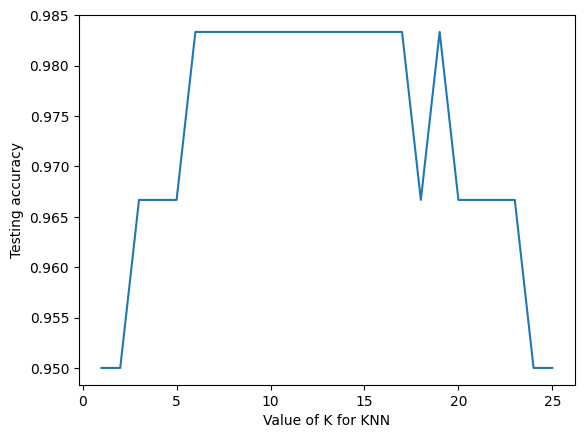

In [27]:
# plotting the relationship between K and testing accuracy

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline 

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy')

#### Making predictions on out-of-sample data

In [29]:
# making the model with the best know parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y not( X_train and y_train) - retraining model with all available data

knn.fit(X, y)

# make prediction for an out-of-sample observation

knn.predict([[3, 5, 4, 2]])

array([1])